In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing important libraries

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()
#from here we discovered that total_bedrooms have some missing values (207 missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)
#remove the missing data to get a clean dataset to work with
data.info()
#making sure the data have non null values for all

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# here we are splitting the data into traning and testing data


In [11]:
training_data=x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19693,-121.60,39.12,21.0,1299.0,338.0,1494.0,311.0,1.3348,INLAND,225000.0
2489,-120.36,36.13,29.0,1938.0,434.0,1306.0,415.0,3.0134,INLAND,55500.0
4431,-118.19,34.08,38.0,1241.0,298.0,1055.0,263.0,2.3409,<1H OCEAN,115500.0
1150,-121.56,39.52,26.0,1957.0,429.0,945.0,397.0,1.7308,INLAND,53600.0
13086,-121.34,38.58,17.0,1605.0,258.0,748.0,262.0,5.0917,INLAND,134100.0
...,...,...,...,...,...,...,...,...,...,...
9172,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,INLAND,154600.0
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611,NEAR OCEAN,240000.0
10271,-117.87,33.87,15.0,1898.0,476.0,1766.0,455.0,2.4929,<1H OCEAN,158500.0
9116,-118.12,34.58,13.0,2614.0,650.0,1949.0,537.0,2.0547,INLAND,102600.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

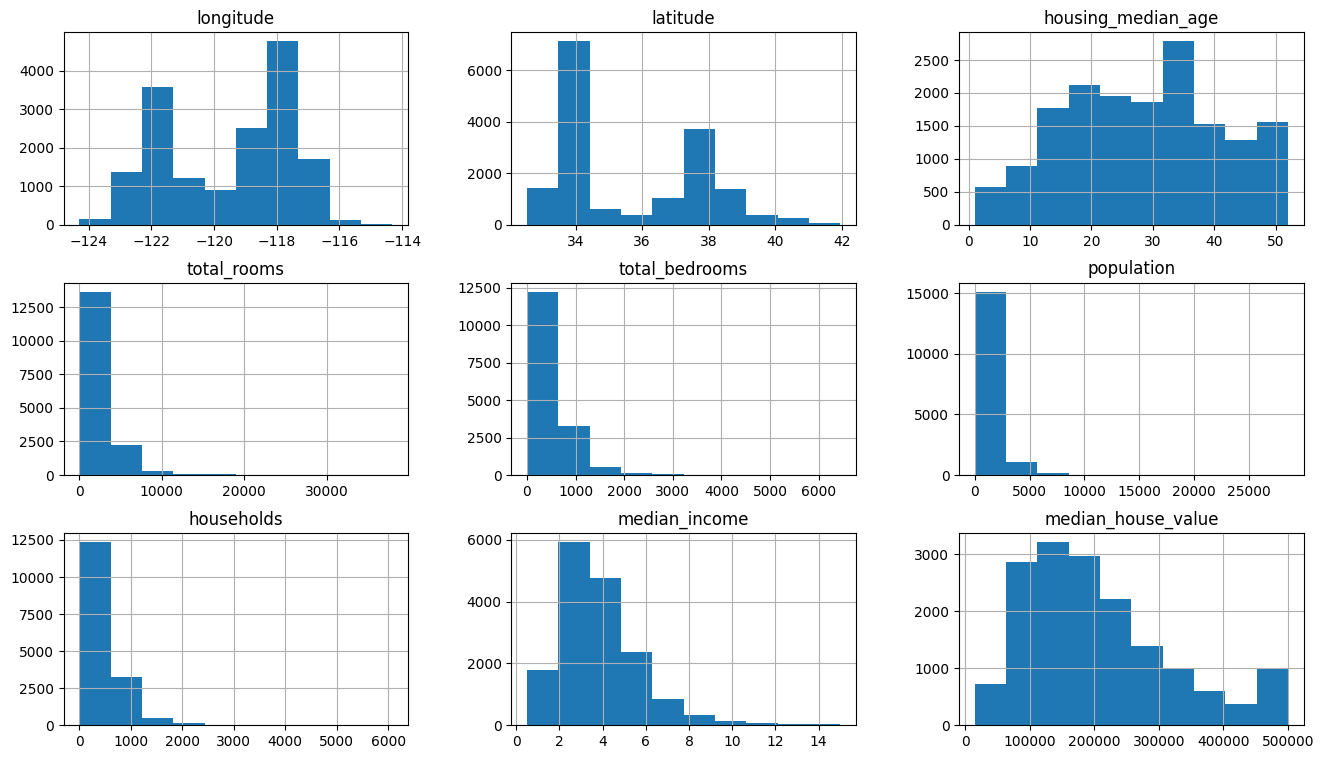

In [12]:
training_data.hist(figsize=(16,9))

In [13]:
training_data['total_rooms'] = np.log(training_data['total_rooms']+1)
training_data['total_bedrooms'] = np.log(training_data['total_bedrooms']+1)
training_data['households'] = np.log(training_data['households']+1)
training_data['population'] = np.log(training_data['population']+1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

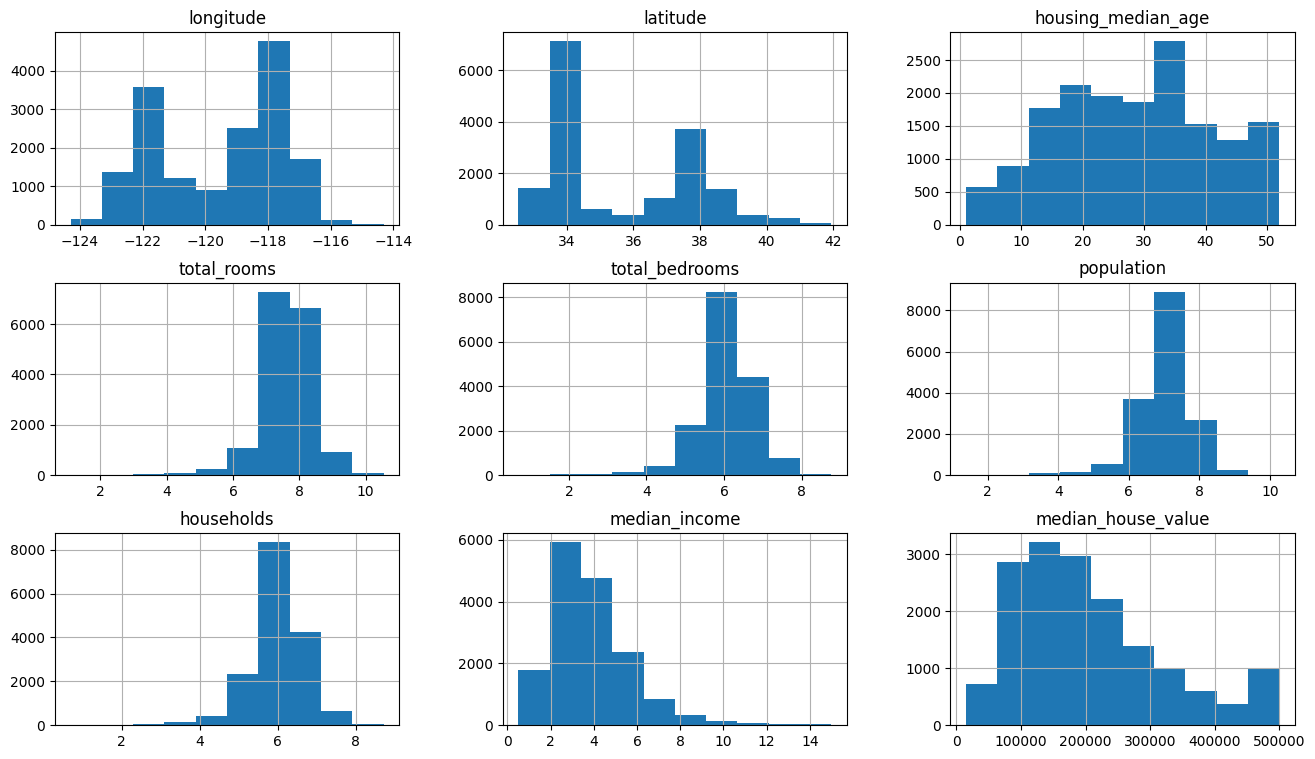

In [14]:
training_data.hist(figsize=(16,9))

In [24]:
trainig_data=training_data.join(pd.get_dummies(training_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
trainig_data
# truning ocean_proximity into numeric data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19693,-121.60,39.12,21.0,7.170120,5.826000,7.309881,5.743003,1.3348,225000.0,0,1,0,0,0
2489,-120.36,36.13,29.0,7.569928,6.075346,7.175490,6.030685,3.0134,55500.0,0,1,0,0,0
4431,-118.19,34.08,38.0,7.124478,5.700444,6.962243,5.575949,2.3409,115500.0,1,0,0,0,0
1150,-121.56,39.52,26.0,7.579679,6.063785,6.852243,5.986452,1.7308,53600.0,0,1,0,0,0
13086,-121.34,38.58,17.0,7.381502,5.556828,6.618739,5.572154,5.0917,134100.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,-118.59,34.47,5.0,6.289716,4.595120,9.074979,4.663439,4.2391,154600.0,0,1,0,0,0
18622,-122.02,37.09,35.0,7.506042,5.910797,6.526495,5.541264,4.8611,240000.0,0,0,0,0,1
10271,-117.87,33.87,15.0,7.549083,6.167516,7.477038,6.122493,2.4929,158500.0,1,0,0,0,0
9116,-118.12,34.58,13.0,7.869019,6.478510,7.575585,6.287859,2.0547,102600.0,0,1,0,0,0
